# Project Title
---

### Group Name

## Team members:
- Waseem Mohammed
- Abdulla Ebrahim


## 🔹 Introduction

Over the past two centuries, the world has seen dramatic improvements in both economic development and public health. Countries that were once struggling with widespread poverty and low life expectancy have, in many cases, achieved remarkable progress in raising living standards and extending lifespans. However, this progress has not been uniform across the globe.

This project explores the relationship between life expectancy, income (GNI per capita), and population trends across countries and over time. Using historical and projected data (1800–2050), we aim to understand how health outcomes are connected to economic conditions, and whether rising wealth always translates into longer lives.

## 🔹 Problem Statement

While global life expectancy has risen significantly since the 19th century, inequalities in health and wealth persist across countries and regions. Wealthier nations generally enjoy longer lives, but the relationship is not always straightforward. At lower income levels, small increases in wealth can dramatically improve health outcomes, while at higher income levels, gains in longevity tend to plateau.

This raises several questions:
- How strongly are income and life expectancy related over time?

- Do all regions follow the same pattern, or are there clear exceptions?

- What role does population growth play in shaping these trends?

- Can improvements in life expectancy be explained solely by income, or do other factors (policy, healthcare, social systems) play a critical role?

By addressing these questions, this project seeks to uncover patterns in the relationship between economic development, health, and population — and to provide evidence-based insights into why some regions thrive while others continue to lag behind.

## 🔹 Objectives

The main objectives of this project are:

1. Explore historical trends in life expectancy, income, and population across countries and regions.

2. Examine the relationship between GNI per capita and life expectancy, identifying whether the relationship is linear or nonlinear.

3. Compare across regions and key countries, highlighting similarities, differences, and outliers.

4. Investigate the role of population size in shaping global averages and disparities.

5. Communicate insights clearly using visualizations that are easy to interpret for both technical and non-technical audiences.

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [2]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
import warnings

sns.set_palette("husl")
%matplotlib inline  


In [3]:

# ===LOAD DATA WITH EXACT PATHS ===
gni_path = "world-development-statistics/gni_per_cap_atlas_method_con2021.csv"
population_path = "world-development-statistics/population.csv"
life_path = "world-development-statistics/life_expectancy.csv"

# Load datasets
gni_df = pd.read_csv(gni_path)
population_df = pd.read_csv(population_path)
life_df = pd.read_csv(life_path)

print("Data loaded successfully!")
print(f"GNI data shape: {gni_df.shape}")
print(f"Population data shape: {population_df.shape}")
print(f"Life Expectancy data shape: {life_df.shape}")


Data loaded successfully!
GNI data shape: (191, 252)
Population data shape: (197, 302)
Life Expectancy data shape: (195, 302)


In [4]:
# === DATA EXPLORATION ===
print("\n=== FIRST LOOK AT EACH DATASET ===")

print("\nLife Expectancy data (first 3 rows):")
print(life_df.head(3))

print("\nGNI data (first 3 rows):")
print(gni_df.head(3))

print("\nPopulation data (first 3 rows):")
print(population_df.head(3))

# Check column names to understand structure
print(f"\nLife Expectancy columns: {life_df.columns.tolist()}")
print(f"GNI columns: {gni_df.columns.tolist()}")
print(f"Population columns: {population_df.columns.tolist()}")



=== FIRST LOOK AT EACH DATASET ===

Life Expectancy data (first 3 rows):
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data (first 3 rows):
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207

In [5]:
# Check if data is in wide format (countries × years)
print("=== DATA STRUCTURE ANALYSIS ===")

# Sample of what the data looks like
print("Life Expectancy data sample:")
print(life_df.head(3))

print("\nGNI data sample:")
print(gni_df.head(3))

# Check if 'country' is the first column and years are other columns
if 'country' in life_df.columns:
    print(f"✅ country column found. Number of countries: {life_df['country'].nunique()}")
    
    # Get year columns (assuming they're numeric)
    year_columns = [col for col in life_df.columns if col.isdigit()]
    print(f"✅ Year columns found: {len(year_columns)} years from {min(year_columns)} to {max(year_columns)}")

=== DATA STRUCTURE ANALYSIS ===
Life Expectancy data sample:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   
2      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   

   2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  

[3 rows x 302 columns]

GNI data sample:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1       Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0  533.0  536.0   
2      Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0  207.0   

   ... 

In [6]:
# Check for missing values
print("=== MISSING VALUES ===")
print("Life Expectancy missing values:")
print(life_df.isnull().sum())

print("\nGNI missing values:")
print(gni_df.isnull().sum())

# Check for duplicates
print("\n=== DUPLICATE CHECK ===")
print(f"Life Expectancy duplicates: {life_df.duplicated().sum()}")
print(f"GNI duplicates: {gni_df.duplicated().sum()}")

# Basic statistics for numeric columns
print("\n=== BASIC STATISTICS ===")
# For wide format data, we need to look at the values across years
# Examine one year column as example
if '2020' in life_df.columns:
    print("Life Expectancy 2020 stats:")
    print(life_df['2020'].describe())

=== MISSING VALUES ===
Life Expectancy missing values:
country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

GNI missing values:
country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

=== DUPLICATE CHECK ===
Life Expectancy duplicates: 0
GNI duplicates: 0

=== BASIC STATISTICS ===
Life Expectancy 2020 stats:
count    186.000000
mean      72.446237
std        6.753106
min       52.000000
25%       67.425000
50%       73.200000
75%       77.000000
max       84.900000
Name: 2020, dtype: float64


### Data Handling: 
__Cleaning, transforming, and combining data__

In [7]:
# Reshaping
def reshape_wide_to_long(df, value_name):
    """
    Convert from wide format (countries × years) to long format
    """
    # Melt the dataframe: keep country, melt year columns
    long_df = df.melt(id_vars=['country'], 
                     var_name='Year', 
                     value_name=value_name)
    
    # Convert Year to integer
    long_df['Year'] = long_df['Year'].astype(int)
    
    # Remove rows with missing values
    long_df = long_df.dropna()
    
    print(f"✅ {value_name}: {long_df['country'].nunique()} countries, {long_df['Year'].nunique()} years")
    return long_df

# Apply to all datasets
print("=== RESHAPING DATA ===")
life_exp_long = reshape_wide_to_long(life_df, 'Life_Expectancy')
gni_long = reshape_wide_to_long(gni_df, 'GNI_per_Capita')
population_long = reshape_wide_to_long(population_df, 'Population')

=== RESHAPING DATA ===
✅ Life_Expectancy: 195 countries, 301 years
✅ GNI_per_Capita: 191 countries, 251 years
✅ Population: 197 countries, 301 years


In [8]:
# Merge step by step
print("=== MERGING DATASETS ===")

# First merge: Life Expectancy + GNI
merged_df = pd.merge(life_exp_long, gni_long, on=['country', 'Year'], how='inner')

# Second merge: Add Population
merged_df = pd.merge(merged_df, population_long, on=['country', 'Year'], how='inner')

print(f"✅ Merged dataset shape: {merged_df.shape}")
print(f"✅ Countries in merged data: {merged_df['country'].nunique()}")
print(f"✅ Years covered: {merged_df['Year'].min()} to {merged_df['Year'].max()}")

# Quick check
print("\n=== MERGED DATA SAMPLE ===")
print(merged_df)

=== MERGING DATASETS ===
✅ Merged dataset shape: (46604, 5)
✅ Countries in merged data: 190
✅ Years covered: 1800 to 2050

=== MERGED DATA SAMPLE ===
                    country  Year  Life_Expectancy GNI_per_Capita Population
0               Afghanistan  1800             28.2          207.0      3.28M
1                    Angola  1800             27.0          517.0      1.57M
2                   Albania  1800             35.4          207.0       400k
3      United Arab Emirates  1800             30.7          738.0      40.2k
4                 Argentina  1800             33.2          794.0       534k
...                     ...   ...              ...            ...        ...
46599                 Samoa  2050             74.3           6440       320k
46600                 Yemen  2050             72.2           1730      55.3M
46601          South Africa  2050             70.9           9220      73.5M
46602                Zambia  2050             69.8           1520      37.5M
466

In [9]:
#Converting string to Integer and float
def to_int(input1):
    """convert string (like 12k, 13.4k) to int """
    if type(input1) == "int":
        return input1
    if "k" in input1:
        return int(float(input1[:-1]) * 1000)
    elif "M" in input1:
        return int(float(input1[:-1]) * 1_000_000)
    elif "B" in input1:
        return int(float(input1[:-1]) * 1_000_000_000)
    else:
        return(int(input1))
def to_float(input1):
    """convert string (like 12k, 13.4k) to int """
    if type(input1) == "float":
        return input1
    if "k" in input1:
        return float(input1[:-1]) * 1000
    elif "M" in input1:
        return float(input1[:-1]) * 1_000_000
    elif "B" in input1:
        return float(input1[:-1]) * 1_000_000_000
    else:
        return(float(input1))

In [10]:
'''Data tyoe check for all columns'''
print(merged_df.columns)
result = []
for value1 in merged_df['GNI_per_Capita']:
    result.append(to_float(str(value1)))
merged_df["GNI_per_Capita"] = result
result = []
for value1 in merged_df['Population']:
    result.append(to_int(str(value1)))
merged_df["Population"] = result
print(merged_df.dtypes)

Index(['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Population'], dtype='object')
country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population           int64
dtype: object


### Analysis: 
__Answering the objectives through data analysis__



In [11]:
print(merged_df.dtypes)
print(merged_df.columns)

country             object
Year                 int64
Life_Expectancy    float64
GNI_per_Capita     float64
Population           int64
dtype: object
Index(['country', 'Year', 'Life_Expectancy', 'GNI_per_Capita', 'Population'], dtype='object')


In [12]:
merged_df.isnull().sum()

country            0
Year               0
Life_Expectancy    0
GNI_per_Capita     0
Population         0
dtype: int64

In [13]:
merged_df.describe(include="all")

,country,Year,Life_Expectancy,GNI_per_Capita,Population
count,46604,46604.000000,46604.000000,46604.000000,4.660400e+04
unique,190,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN
freq,251,NaN,NaN,NaN,NaN
mean,NaN,1925.536220,47.719158,5170.894837,1.800181e+07
std,NaN,72.374689,18.642026,12818.065287,8.464023e+07
min,NaN,1800.000000,1.010000,28.000000,2.260000e+03
25%,NaN,1863.000000,32.000000,402.000000,4.590000e+05
50%,NaN,1926.000000,39.100000,884.500000,2.300000e+06
75%,NaN,1988.000000,66.300000,3190.000000,8.690000e+06


## ✅ Selection Strategy

We’ll choose 6 countries to represent three tiers of development (based on GNI per capita, population, and life expectancy).
### High tier (wealthy & long life expectancy)

- United States (large population, high GNI, high life expectancy)
- Japan (smaller population than US, but very high life expectancy and wealth)

### Medium tier (moderate income, growing life expectancy)

- Brazil (emerging economy, middle-income, rising life expectancy)
- India (huge population, middle-to-lower GNI, steady progress in life expectancy)

### Low tier (low GNI, shorter life expectancy)

- Nigeria (large population, low GNI, lower life expectancy trends)
- Ethiopia (smaller population, low GNI, also among lowest life expectancies historically)

## ✅ Why these countries?

- They span all world regions (North America, Asia, South America, Africa).

- They cover all levels of development (rich, middle, poor).

- They have data from 1800 to 2050 (not every dataset has complete data for every country — but these do).


In [34]:
focus_countries = ["United States", "Japan", "Brazil", "India", "Nigeria", "Ethiopia"]
merged_df[merged_df["country"].isin(focus_countries)].groupby("country").agg({"Life_Expectancy": ["mean","min","max"],"GNI_per_Capita":["mean","min","max"],"Population":["mean","min","max"]})

Life_Expectancy              GNI_per_Capita                    \
                         mean    min   max           mean     min       max   
country                                                                       
Brazil              46.775697  26.20  81.6    2904.382470   358.0   14300.0   
Ethiopia            39.492430   4.00  76.7     547.163347   153.0    2360.0   
India               41.131912   9.31  76.2     967.525896   397.0    5340.0   
Japan               55.408765  30.80  88.4   18798.127490  2290.0   71800.0   
Nigeria             43.216733  17.30  74.2    1080.135458   494.0    3240.0   
United States       58.263347  31.00  83.5   26846.494024  3120.0  116000.0   

                 Population                         
                       mean        min         max  
country                                             
Brazil         7.484231e+07    2500000   231000000  
Ethiopia       4.426892e+07   12000000   215000000  
India          5.770080e+08  201000000  1670000000  
Japan          7.164861e+07   28000000   128000000  
Nigeria        7.320199e+07   12100000   377000000  
United States  1.444551e+08    6000000   375000000

In [39]:
'''Filtering the merged_df to only 6 countries'''
# Step 1: Select the 6 representative countries
selected_countries = ["United States", "Japan", "Brazil", "India", "Nigeria", "Ethiopia"]

# Step 2: Filter the merged_df to only these countries
filtered_df = merged_df[merged_df["country"].isin(selected_countries)].copy()

# Step 3: Confirm the size and countries
print("✅ Filtered dataset shape:", filtered_df.shape)
print("✅ Countries in filtered dataset:", filtered_df["country"].unique())
print("✅ Years covered:", filtered_df["Year"].min(), "to", filtered_df["Year"].max())

# Step 4: Preview sample rows
print(filtered_df.head(10))

✅ Filtered dataset shape: (1506, 5)
✅ Countries in filtered dataset: ['Brazil' 'Ethiopia' 'India' 'Japan' 'Nigeria' 'United States']
✅ Years covered: 1800 to 2050
           country  Year  Life_Expectancy  GNI_per_Capita  Population
22          Brazil  1800             32.0           379.0     2500000
53        Ethiopia  1800             29.7           342.0    12000000
76           India  1800             25.4           486.0   201000000
85           Japan  1800             36.4          2300.0    28000000
121        Nigeria  1800             30.4           608.0    12100000
173  United States  1800             39.4          3150.0     6000000
206         Brazil  1801             32.0           379.0     2570000
237       Ethiopia  1801             29.7           342.0    12000000
260          India  1801             25.4           486.0   201000000
269          Japan  1801             36.4          2300.0    28100000


In [40]:
filtered_df.shape

(1506, 5)

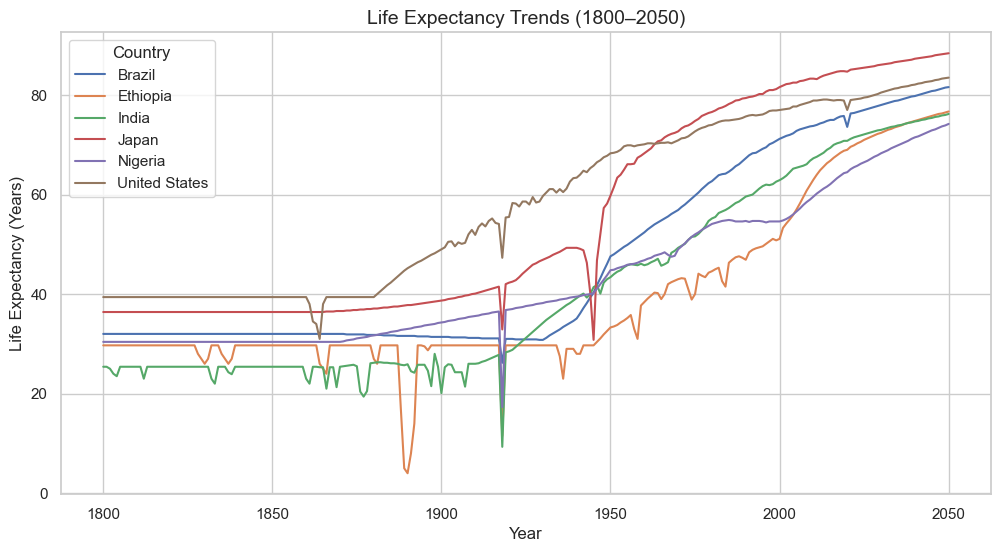

In [42]:
# Set style for seaborn
sns.set_theme(style="whitegrid", palette="deep")

# ==============================
# 1. Life Expectancy over Time (Line Chart)
# ==============================
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="Year", y="Life_Expectancy", hue="country")
plt.title("Life Expectancy Trends (1800–2050)", fontsize=14)
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


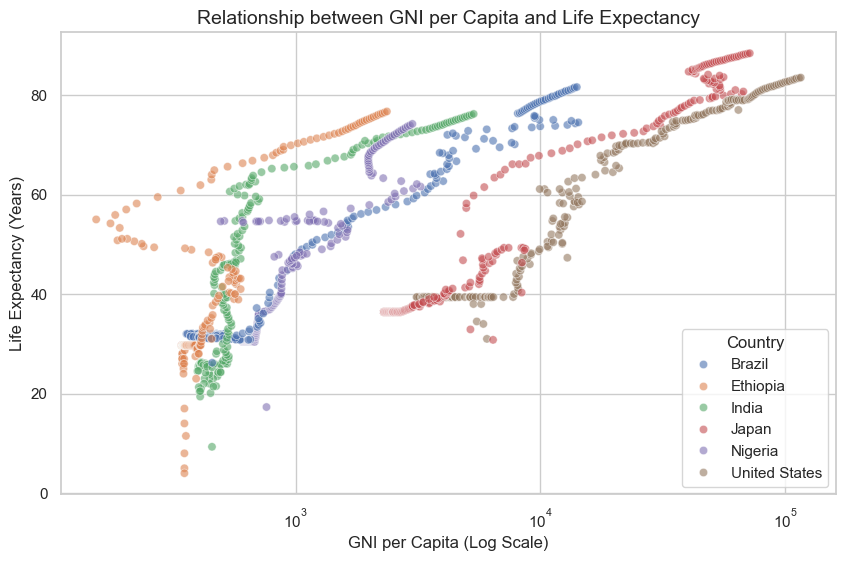

In [43]:

# ==============================
# 2. GNI per Capita vs Life Expectancy (Scatter with log scale)
# ==============================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df, 
    x="GNI_per_Capita", 
    y="Life_Expectancy", 
    hue="country",
    alpha=0.6
)
plt.xscale("log")  # log scale makes differences clearer
plt.title("Relationship between GNI per Capita and Life Expectancy", fontsize=14)
plt.xlabel("GNI per Capita (Log Scale)")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Country")
plt.show()


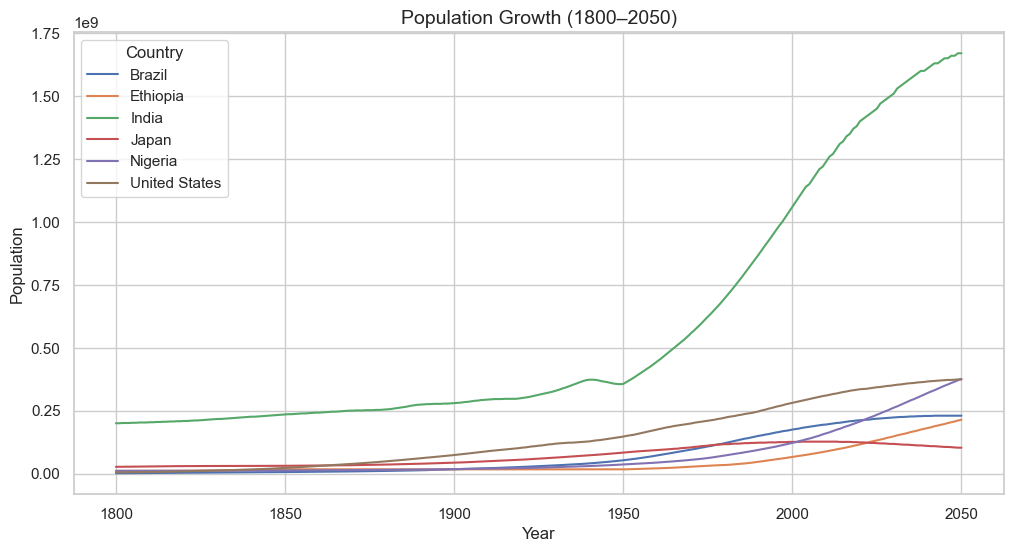

In [44]:

# ==============================
# 3. Population Growth over Time (Line Chart)
# ==============================
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="Year", y="Population", hue="country")
plt.title("Population Growth (1800–2050)", fontsize=14)
plt.ylabel("Population")
plt.xlabel("Year")
plt.legend(title="Country")
plt.show()


C:\Users\wasee\AppData\Local\Temp\ipykernel_3708\437972929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_life, x="country", y="Life_Expectancy", palette="viridis")


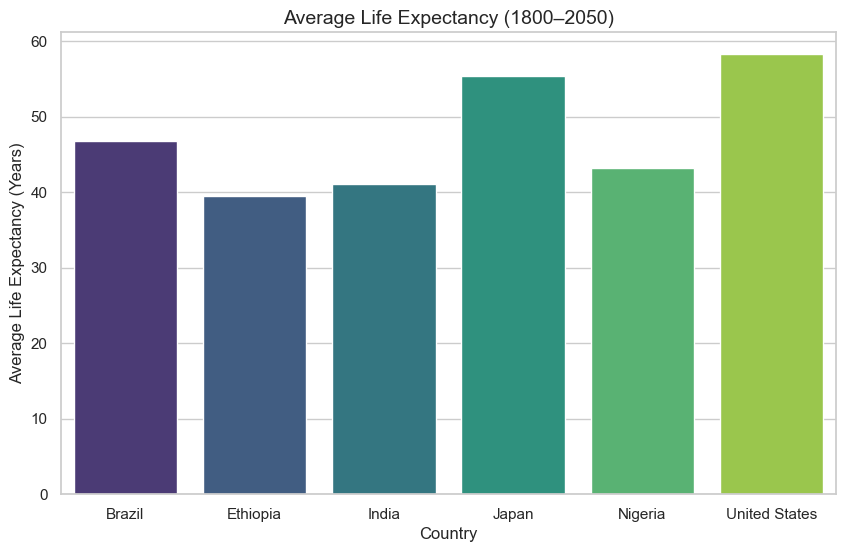

In [45]:

# ==============================
# 4. Average Life Expectancy (Bar Chart)
# ==============================
avg_life = filtered_df.groupby("country")["Life_Expectancy"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_life, x="country", y="Life_Expectancy", palette="viridis")
plt.title("Average Life Expectancy (1800–2050)", fontsize=14)
plt.ylabel("Average Life Expectancy (Years)")
plt.xlabel("Country")
plt.show()

In [38]:
merged_df.drop(columns=["Log_GNI_per_Capita", "Region"], inplace=True)

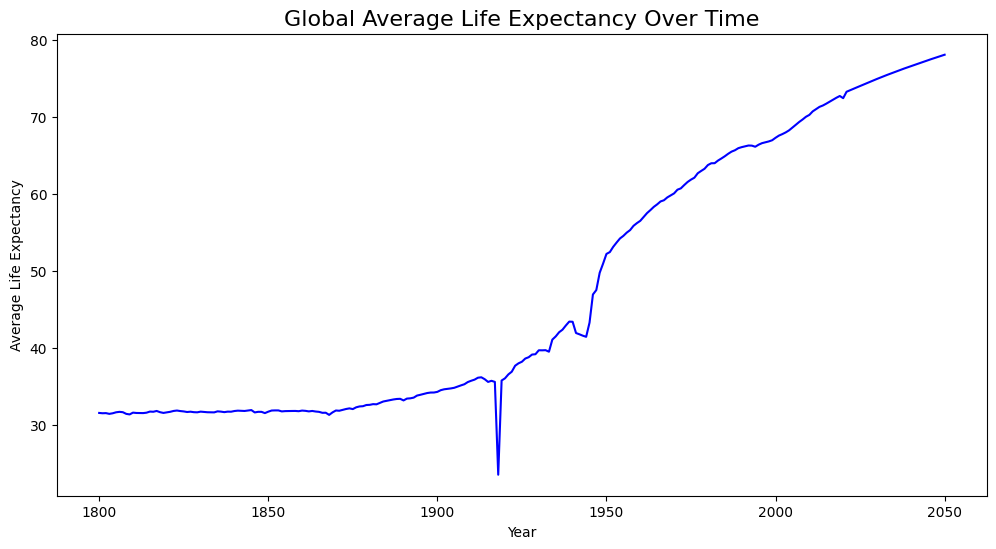

In [14]:
# Calculate global average life expectancy per year
avg_life_expectancy = merged_df.groupby("Year")["Life_Expectancy"].mean()

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_life_expectancy.index, y=avg_life_expectancy.values, color="blue")
plt.title("Global Average Life Expectancy Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.show()

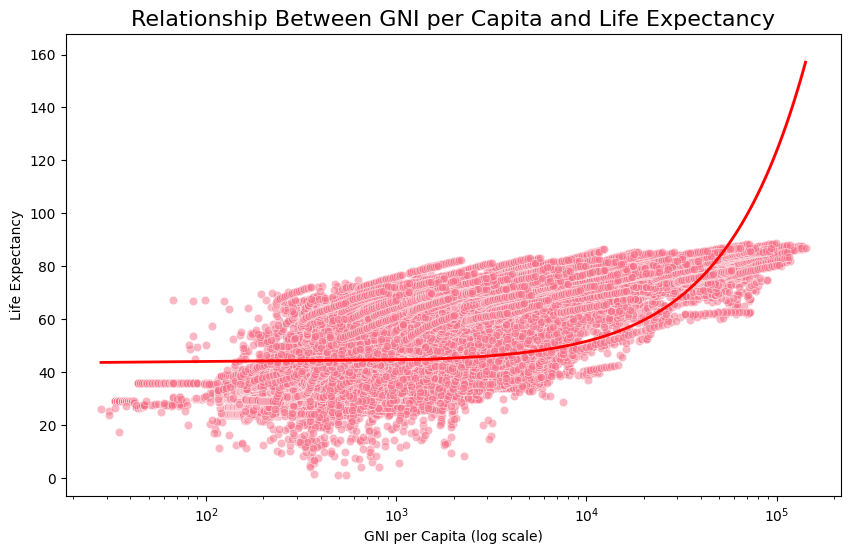

In [15]:
# Scatterplot for all countries and years
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="GNI_per_Capita", y="Life_Expectancy", alpha=0.5)

# Add regression line
sns.regplot(data=merged_df, x="GNI_per_Capita", y="Life_Expectancy",
            scatter=False, color="red", line_kws={"lw":2})

plt.xscale("log")  # log scale for GNI because values vary a lot
plt.title("Relationship Between GNI per Capita and Life Expectancy", fontsize=16)
plt.xlabel("GNI per Capita (log scale)")
plt.ylabel("Life Expectancy")
plt.show()

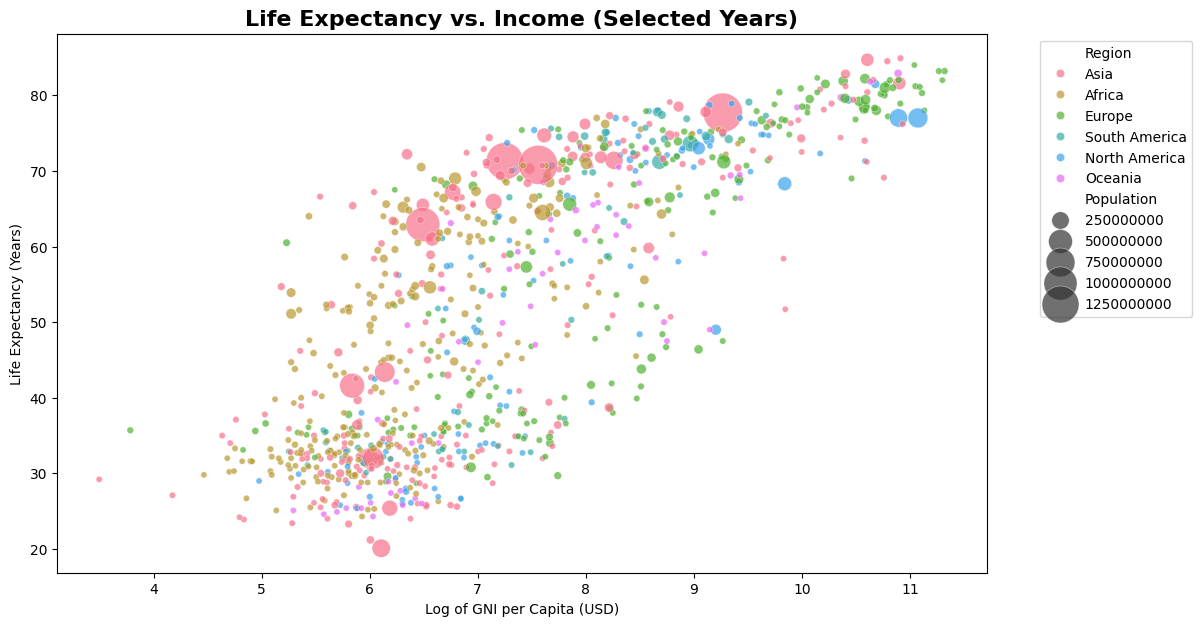

In [30]:
# Ensure log GNI column
merged_df['Log_GNI_per_Capita'] = np.log(merged_df['GNI_per_Capita'])

# Choose some key years
focus_years = [1800, 1900, 1950, 2000, 2020]
df_focus = merged_df[merged_df['Year'].isin(focus_years)]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_focus,
    x="Log_GNI_per_Capita",
    y="Life_Expectancy",
    hue="Region",
    size="Population",
    sizes=(20, 800),
    alpha=0.7
)

plt.title("Life Expectancy vs. Income (Selected Years)", fontsize=16, weight="bold")
plt.xlabel("Log of GNI per Capita (USD)")
plt.ylabel("Life Expectancy (Years)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

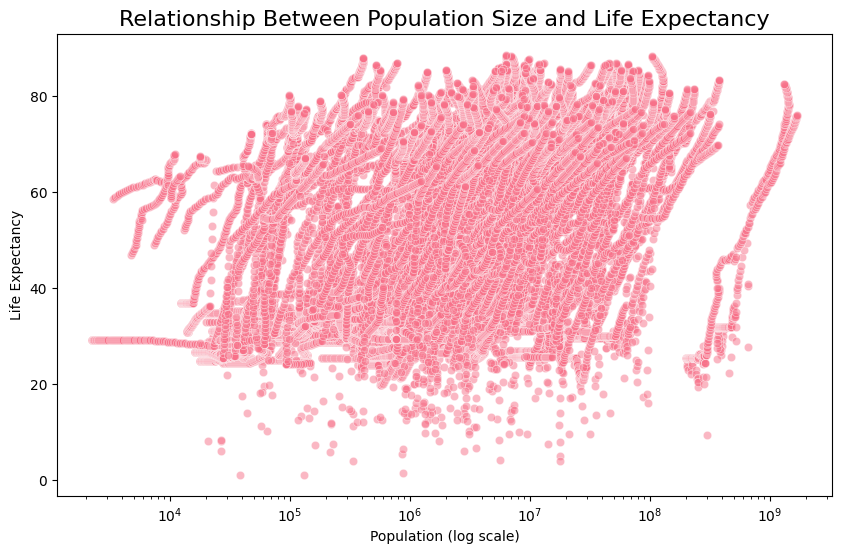

In [19]:
# Scatterplot: Population vs Life Expectancy
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="Population", y="Life_Expectancy", alpha=0.5)

plt.xscale("log")  # log scale for population (since it ranges from thousands to billions)
plt.title("Relationship Between Population Size and Life Expectancy", fontsize=16)
plt.xlabel("Population (log scale)")
plt.ylabel("Life Expectancy")
plt.show()

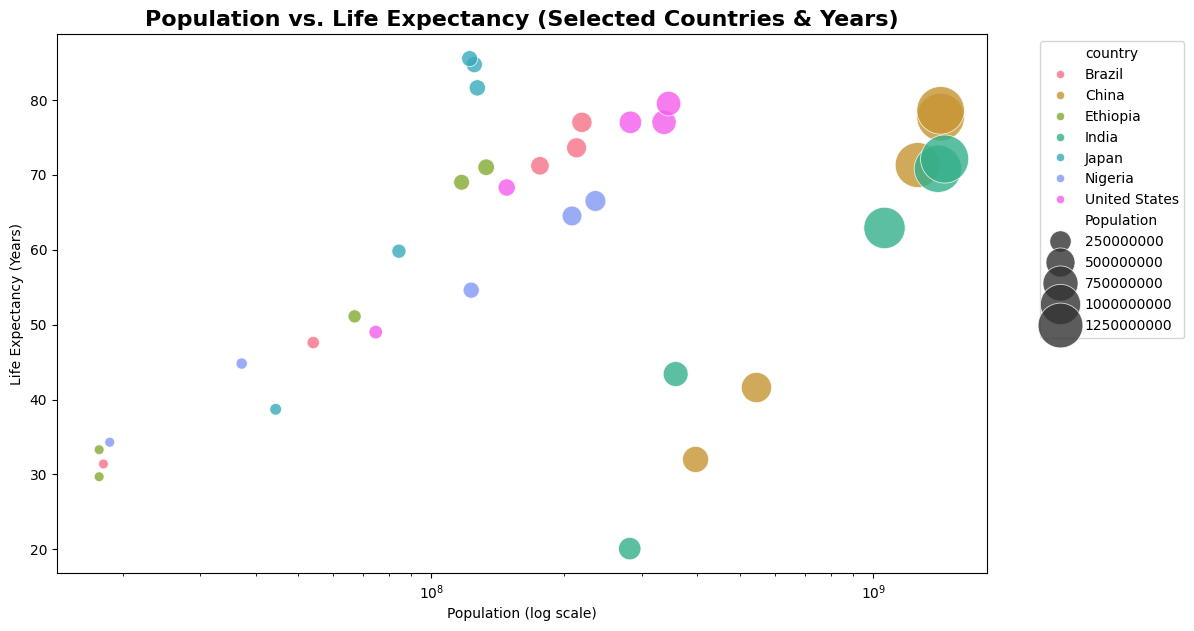

In [20]:
key_countries = ["China", "India", "United States", "Japan", 
                 "Nigeria", "Brazil", "Ethiopia"]

df_keys = merged_df[merged_df["country"].isin(key_countries)]
df_keys_recent = df_keys[df_keys["Year"].isin([1900, 1950, 2000, 2020,2025])]

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_keys_recent,
    x="Population",
    y="Life_Expectancy",
    hue="country",
    size="Population",
    sizes=(50, 1200),
    alpha=0.8
)

plt.xscale("log")  # population is huge, log makes it readable
plt.title("Population vs. Life Expectancy (Selected Countries & Years)", fontsize=16, weight="bold")
plt.xlabel("Population (log scale)")
plt.ylabel("Life Expectancy (Years)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

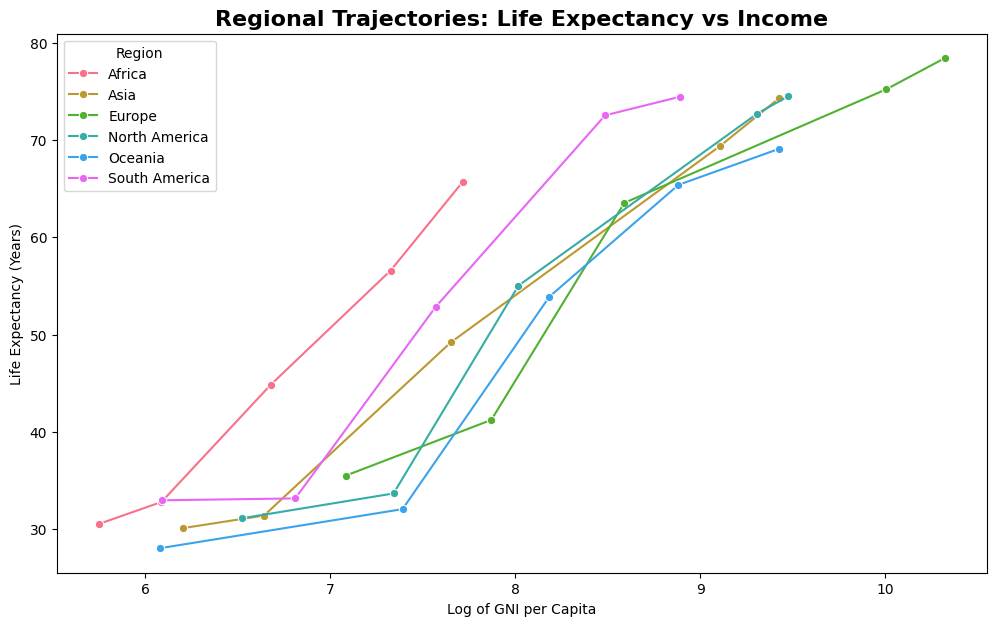

In [21]:
df_region_avg = merged_df.groupby(["Region", "Year"]).agg({
    "Life_Expectancy": "mean",
    "GNI_per_Capita": "mean",
    "Population": "sum"
}).reset_index()

df_region_avg["Log_GNI_per_Capita"] = np.log(df_region_avg["GNI_per_Capita"])

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df_region_avg[df_region_avg["Year"].isin([1800, 1900, 1950, 2000, 2020])],
    x="Log_GNI_per_Capita",
    y="Life_Expectancy",
    hue="Region",
    marker="o"
)

plt.title("Regional Trajectories: Life Expectancy vs Income", fontsize=16, weight="bold")
plt.xlabel("Log of GNI per Capita")
plt.ylabel("Life Expectancy (Years)")
plt.show()

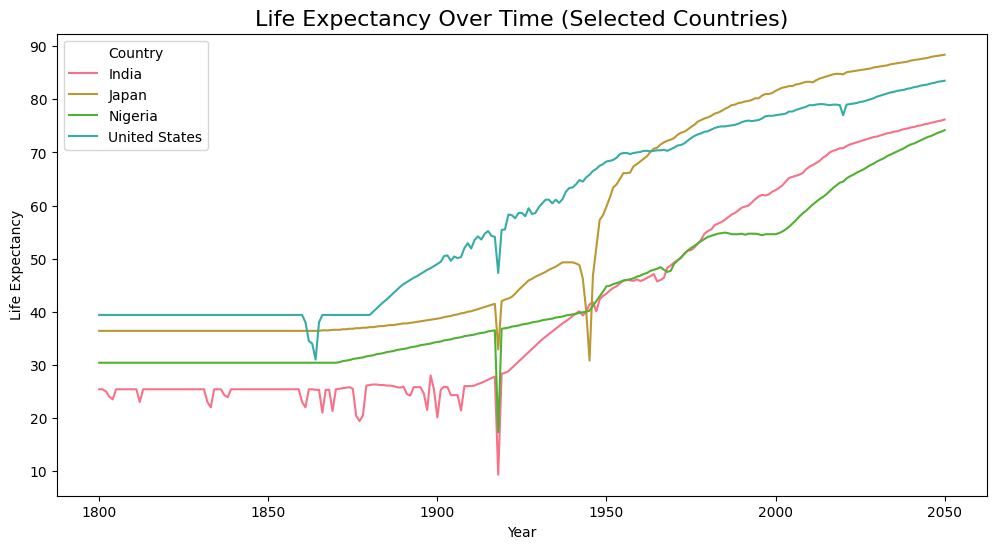

In [22]:
# Select specific countries
countries_to_compare = ["United States", "Japan", "Nigeria", "India"]
subset = merged_df[merged_df["country"].isin(countries_to_compare)]

# Line plot of life expectancy over time for selected countries
plt.figure(figsize=(12,6))
sns.lineplot(data=subset, x="Year", y="Life_Expectancy", hue="country")
plt.title("Life Expectancy Over Time (Selected Countries)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(title="Country")
plt.show()

C:\Users\wasee\AppData\Local\Temp\ipykernel_3708\2890735231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data.values, y=region_data.index, palette="viridis")


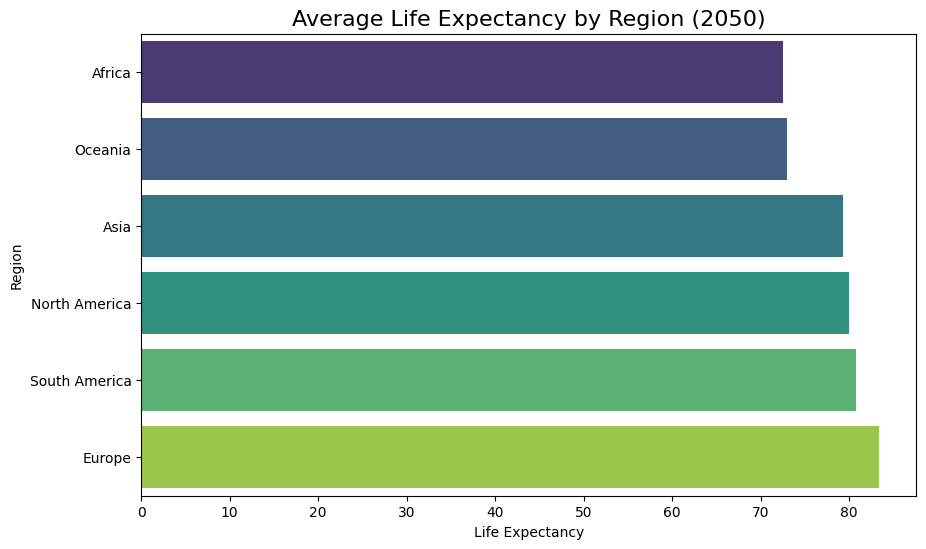

In [23]:
# Average life expectancy by region (latest year available, e.g., 2020 or 2050)
latest_year = merged_df["Year"].max()
region_data = merged_df[merged_df["Year"] == latest_year].groupby("Region")["Life_Expectancy"].mean().sort_values()

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=region_data.values, y=region_data.index, palette="viridis")
plt.title(f"Average Life Expectancy by Region ({latest_year})", fontsize=16)
plt.xlabel("Life Expectancy")
plt.ylabel("Region")
plt.show()

In [24]:
merged_df["country"].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala'

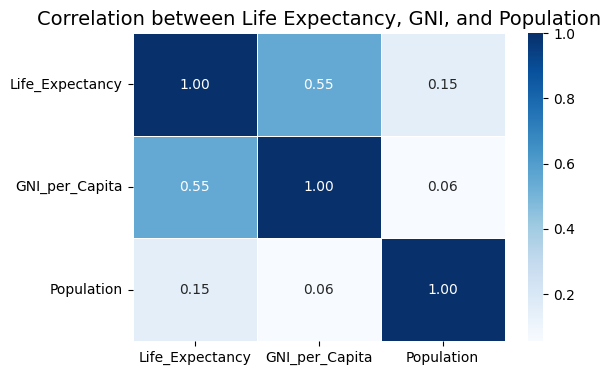

In [25]:
# Select only numeric columns of interest
corr = merged_df[["Life_Expectancy", "GNI_per_Capita", "Population"]].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Life Expectancy, GNI, and Population", fontsize=14)
plt.show()

👉 Interpretation:

Close to +1 → strong positive relationship (when one goes up, the other goes up).

Close to -1 → strong negative relationship (when one goes up, the other goes down).

Close to 0 → weak or no linear relationship.

For example, you’d expect:

Life Expectancy ↔ GNI → strong positive correlation.

Life Expectancy ↔ Population → weak correlation (not very direct).

C:\Users\wasee\AppData\Local\Temp\ipykernel_3708\3514768399.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data.values, y=region_data.index, palette="viridis")


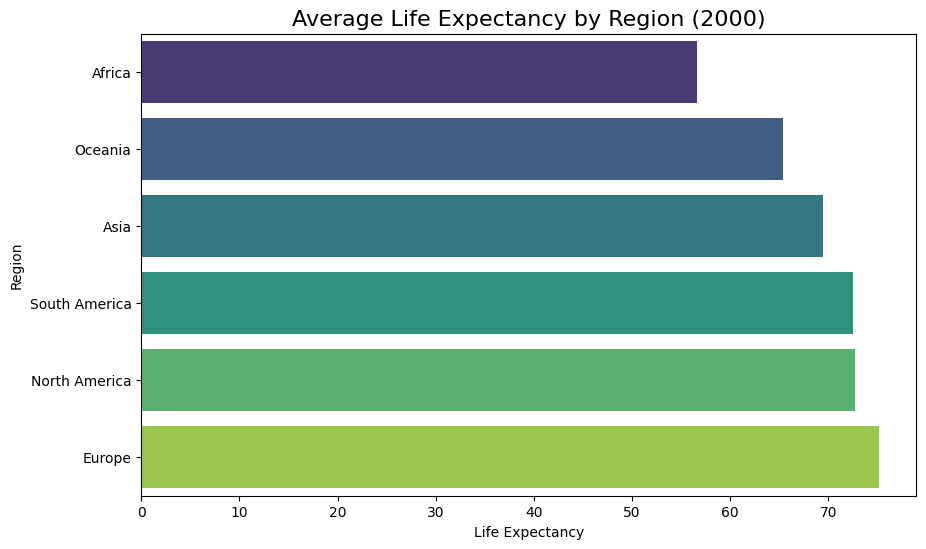

In [27]:
# Average life expectancy by region (latest year available, e.g., 2020 or 2050)
latest_year = 2000
region_data = merged_df[merged_df["Year"] == latest_year].groupby("Region")["Life_Expectancy"].mean().sort_values()

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=region_data.values, y=region_data.index, palette="viridis")
plt.title(f"Average Life Expectancy by Region ({latest_year})", fontsize=16)
plt.xlabel("Life Expectancy")
plt.ylabel("Region")
plt.show()

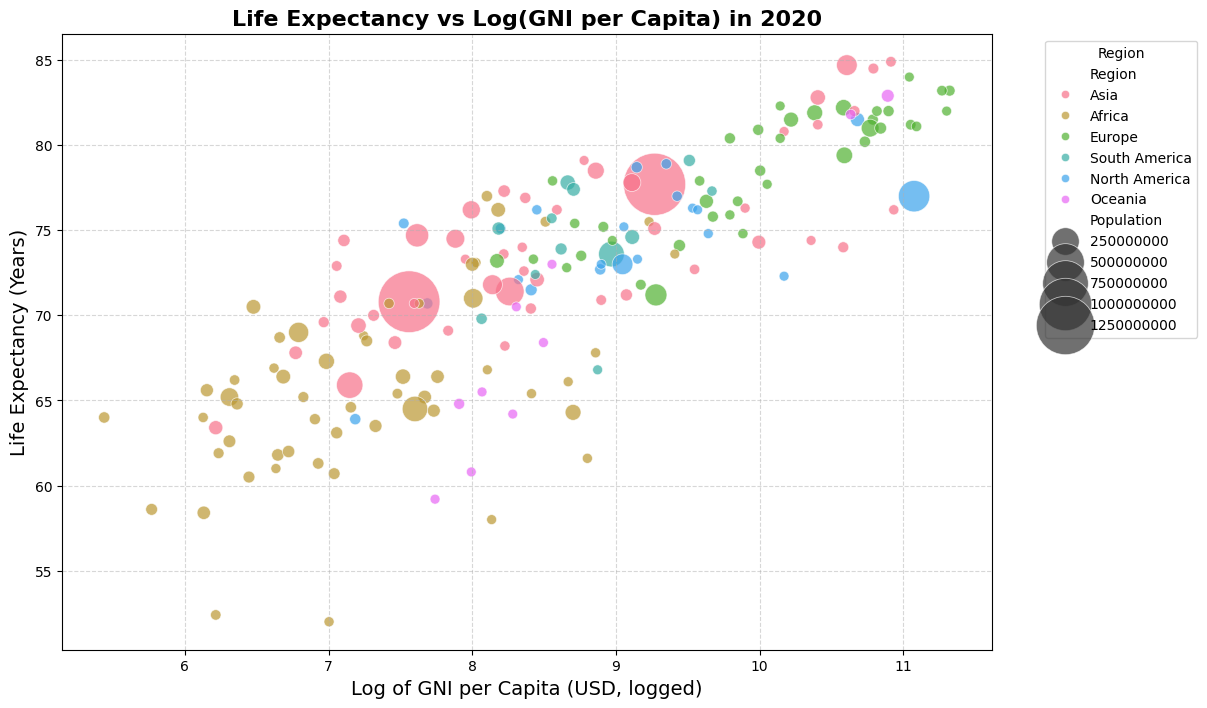

In [28]:

# Apply log transformation for income
merged_df['Log_GNI_per_Capita'] = np.log(merged_df['GNI_per_Capita'])

# Pick a specific year for visualization (e.g., 2020)
year = 2020
plot_df = merged_df[merged_df['Year'] == year].copy()

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=plot_df,
    x='Log_GNI_per_Capita',
    y='Life_Expectancy',
    hue='Region',
    size='Population',
    sizes=(50, 2000),  # scale bubble sizes
    alpha=0.7
)

plt.title(f"Life Expectancy vs Log(GNI per Capita) in {year}", fontsize=16, weight='bold')
plt.xlabel("Log of GNI per Capita (USD, logged)", fontsize=14)
plt.ylabel("Life Expectancy (Years)", fontsize=14)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...